In [67]:
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [68]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [69]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [70]:
# importando o dataset
df = pd.read_csv('dataset/data-set-clube-new.csv', sep=';')

In [71]:
# checando as 3 primeiras linhas do dataset
df.head(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,54486,ATIVO,0,0,0,0
1,54460,ATIVO,0,0,0,0
2,54462,ATIVO,0,0,0,0


In [72]:
# checando as 3 últimas linhas do dataset
df.tail(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
11985,55648,ATIVO,0,0,0,0
11986,55789,ATIVO,0,0,0,0
11987,49255,ATIVO,0,8,4,4


In [73]:
# quantidade de linhas e colunas do dataset
print(df.shape)

(11988, 6)


In [74]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

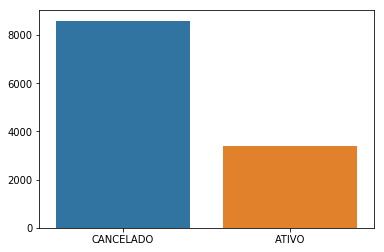

In [75]:
status = df["status"].value_counts()
sns.barplot(status.index, status.values)

In [76]:
# Após a analise do gráfico acima, podemos ver que a maioria do dataset tem o "status" cancelado e ...

status_ativo = df["status"][df["status"] == "CANCELADO"]
print("Porcentagem de Status Ativo = "+str((status_ativo.shape[0] / df["status"].shape[0]) * 100))

Porcentagem de Status Ativo = 71.73006339673006


In [77]:
# ... a minoria está com status ATIVO
status_ativo = df["status"][df["status"] == "ATIVO"]
print("Porcentagem de Status Ativo = "+str((status_ativo.shape[0] / df["status"].shape[0]) * 100))

Porcentagem de Status Ativo = 28.269936603269937


In [78]:
# describe dataset

# count = quantidade
# mean = média
# std = desvio padrão
# min = valor mínimo
# max = valor máximo

df.describe()

,id_socio,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
count,11988.000000,11988.000000,11988.000000,11988.000000,11988.000000
mean,22757.953537,4.804721,1.241408,0.920921,4.672589
std,12431.713232,8.342815,4.194899,3.408348,23.466164
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11348.750000,0.000000,0.000000,0.000000,0.000000
50%,23014.500000,0.000000,0.000000,0.000000,0.000000
75%,32053.250000,12.000000,0.000000,0.000000,0.000000
max,56508.000000,62.000000,53.000000,39.000000,490.000000


In [79]:
# Checando alguns resultados do describe
maximo = df['qtde_frequencia_ano'] == 490
maximo = df[maximo]
maximo

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
11353,34836,ATIVO,12,12,0,490


In [80]:
# Checando alguns resultados do describe
maximo = df['qtde_em_aberto'] == 62
maximo = df[maximo]
maximo

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
977,10527,CANCELADO,62,0,2,1


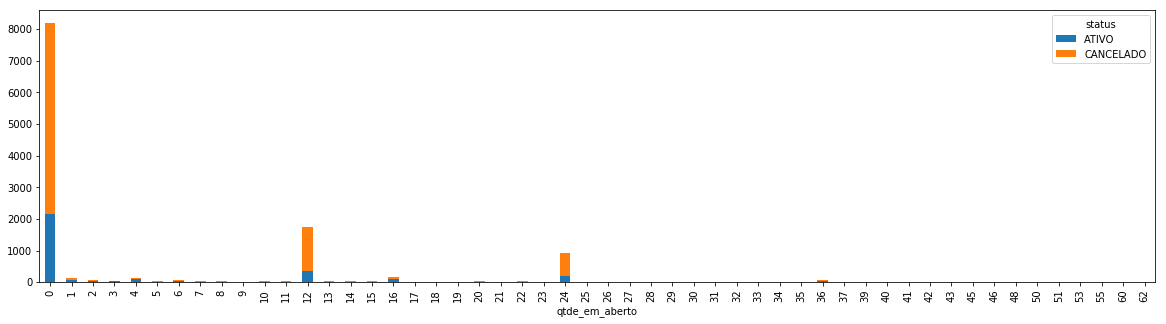

In [81]:
# Relação das variáveis status e parcelas em aberto
# Podemos analisar que a maior parte dos cancelamentos não tinham parcelas em aberto.


df.groupby(["qtde_em_aberto", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))

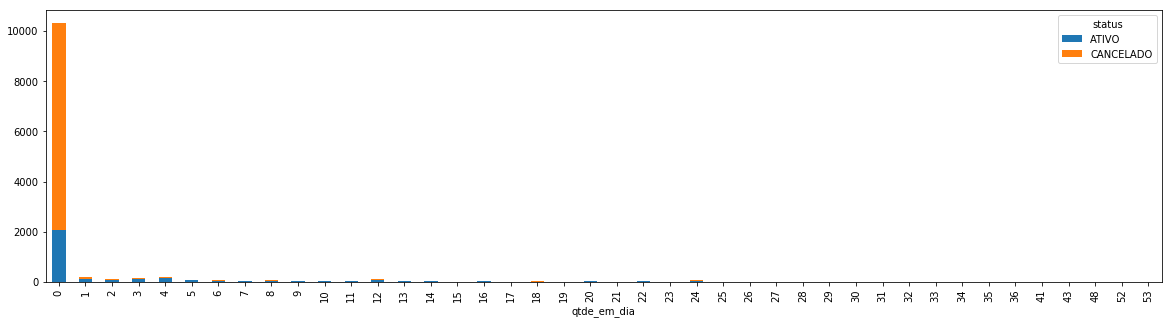

In [82]:
# Relação das variáveis status e parcelas em dia
df.groupby(["qtde_em_dia", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))

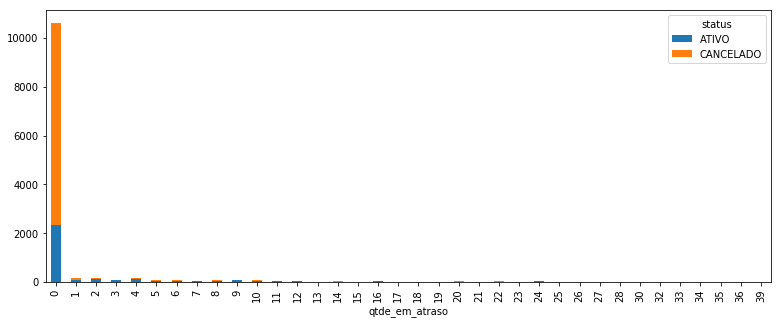

In [83]:
# Relação das variáveis status e quantidade de parcelas em atraso
df.groupby(["qtde_em_atraso", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(13,5))

In [84]:
# Todos os Status cancelados

cancelados = df["status"] == "CANCELADO"
cancelados = df[cancelados]
print(cancelados)

       id_socio     status  qtde_em_aberto  qtde_em_dia  qtde_em_atraso  \
6         38810  CANCELADO              24            0               0   
12        54088  CANCELADO               0            0               0   
18        31324  CANCELADO              12            1               2   
19        34368  CANCELADO               9            1               2   
22        27004  CANCELADO              14            1               0   
28        13375  CANCELADO               9            1               2   
29        10326  CANCELADO              20            0               4   
39        28512  CANCELADO              14            0               0   
61        54168  CANCELADO               0            0               1   
62        45628  CANCELADO              18            2               5   
68        31500  CANCELADO               0            8               4   
73        10847  CANCELADO              24            0              24   
78        13405  CANCELAD

In [85]:
# Todos os Status cancelados

# Podemos observar que as colunas qtde_em_aberto, qtde_em_dia e qtde_em_atraso
# estão zeradas, o que dificuta a compreensão, pois a coluna qtde_em_dia é oposta a qtde_em_atraso?

# uma sugestão para uma melhor análise seria a data de cadastro do sócio e a data da saída?
# Conferir a possibilidade com o Reinaldo.

# Uma dúvida: um sócio tem condições para abandonar o clube? 

ativos = df["status"] == "ATIVO"
ativos = df[ativos]
ativos.head(5)
print(ativos)

       id_socio status  qtde_em_aberto  qtde_em_dia  qtde_em_atraso  \
0         54486  ATIVO               0            0               0   
1         54460  ATIVO               0            0               0   
2         54462  ATIVO               0            0               0   
3         54358  ATIVO               0            0               0   
4         54115  ATIVO               0            0               0   
5         53771  ATIVO               0            0               0   
7         54026  ATIVO               0            0               0   
8         54245  ATIVO               0            0               0   
9         54364  ATIVO               0            0               0   
10        54142  ATIVO               0            0               0   
11        54333  ATIVO               0            0               0   
13        54271  ATIVO               0            0               0   
14        54366  ATIVO               0            0               0   
15    

In [86]:
# Passando os todas as colunas para o tipo inteiro

label_encoder = preprocessing.LabelEncoder()

df['id_socio'] = label_encoder.fit_transform(df['id_socio'])
df['status'] = label_encoder.fit_transform(df['status'])
df['qtde_em_aberto'] = label_encoder.fit_transform(df['qtde_em_aberto'])
df['qtde_em_dia'] = label_encoder.fit_transform(df['qtde_em_dia'])
df['qtde_em_atraso'] = label_encoder.fit_transform(df['qtde_em_atraso'])

print (df.dtypes)

id_socio               int64
status                 int64
qtde_em_aberto         int64
qtde_em_dia            int64
qtde_em_atraso         int64
qtde_frequencia_ano    int64
dtype: object


In [87]:
df.head()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,11910,0,0,0,0,0
1,11905,0,0,0,0,0
2,11906,0,0,0,0,0
3,11896,0,0,0,0,0
4,11865,0,0,0,0,0


In [88]:
# identificando a correlação entre as variáveis
# Correlação não implica causalidade

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

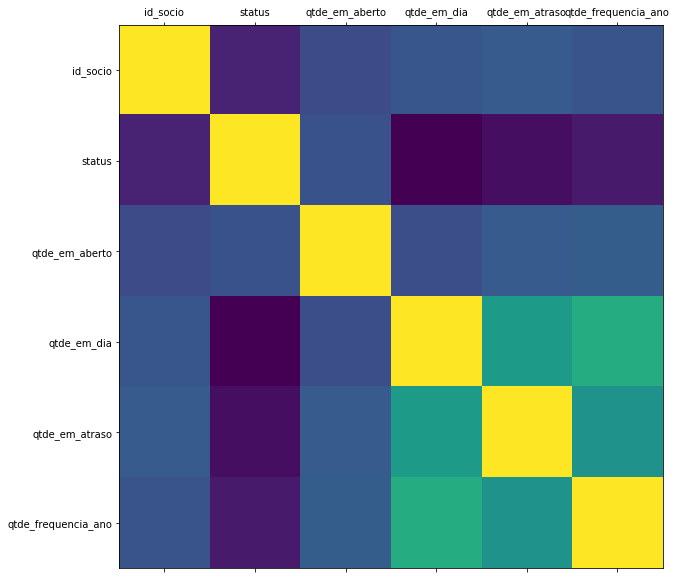

In [89]:
# criando o gráfico da função acima

plot_corr(df)

In [90]:
# Visualizando a correlação em tabela
# Coeficiente de correlação:
   
    # +1 = forte correlação positiva
    # 0 = não há correlação
    # -1 forte correlação negativa
df.corr()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
id_socio,1.000000,-0.228333,-0.046431,0.007105,0.033373,-0.008480
status,-0.228333,1.000000,-0.014005,-0.359070,-0.308415,-0.261584
qtde_em_aberto,-0.046431,-0.014005,1.000000,-0.032348,0.031767,0.041415
qtde_em_dia,0.007105,-0.359070,-0.032348,1.000000,0.382745,0.484203
qtde_em_atraso,0.033373,-0.308415,0.031767,0.382745,1.000000,0.339064
qtde_frequencia_ano,-0.008480,-0.261584,0.041415,0.484203,0.339064,1.000000


In [91]:
# Definindo boolean para a coluna Status
status_map = {True: 1, False : 0}

In [92]:
df['status'] = df['status'].map(status_map)

In [93]:
# Conferindo até achar os 2 status: 0 e 1.
df.head(7)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,11910,0,0,0,0,0
1,11905,0,0,0,0,0
2,11906,0,0,0,0,0
3,11896,0,0,0,0,0
4,11865,0,0,0,0,0
5,11839,0,0,0,0,0
6,10466,1,24,0,0,0


In [94]:
# SPLITING (Separando a base de teste)
# 70% para dados de treino
# 30% para dados de teste

from sklearn.model_selection import train_test_split

In [95]:
# Seleção de variáveis (Feature Selection)
atributos = ['qtde_em_aberto', 'qtde_em_dia', 'qtde_em_atraso', 'qtde_frequencia_ano']

In [96]:
# Variável para ser prevista
atrib_prev = ['status']

In [97]:
# Criando os objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [98]:
# Definindo a taxa de split
split_test_size = 0.30

In [99]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [100]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.99% nos dados de treino
30.01% nos dados de teste


In [103]:
# Verificando o Split

print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 1]),
                                             (len(df.loc[df['status'] == 1])/len(df.index) * 100)))

print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 0]),
                                             (len(df.loc[df['status'] == 0])/len(df.index) * 100)))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                             (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                             (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))

print("")
print("Test True: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                             (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                             (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True: 8599 (71.73%)
Original False: 3389 (28.27%)

Training True: 5983 (71.30%)
Training False: 2408 (28.70%)

Test True: 2616 (72.73%)
Test False: 981 (27.27%)


In [106]:
df.head(7)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,11910,0,0,0,0,0
1,11905,0,0,0,0,0
2,11906,0,0,0,0,0
3,11896,0,0,0,0,0
4,11865,0,0,0,0,0
5,11839,0,0,0,0,0
6,10466,1,24,0,0,0


In [108]:
# Construindo e treinando o modelo preditivo
# Utilizando um classificador de Naive Bayes

modelo_v1 = GaussianNB()

In [109]:
# Treinando o modelo

modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
# Verificando a exatidão no modelo nos dados de treino
from sklearn import metrics

nb_predict_train = modelo_v1.predict(X_treino)

print("Exatidão (Accuracy): {0: .4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy):  0.7899

